<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/Shopping_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import numpy as np # Importing the numpy library for array operations and mathematical functions
import pandas as pd # Use for exploring the data
import seaborn as sns # it has also plot
import matplotlib.pyplot as plt # for some extra plot functions
import plotly.express as px # this library can makes interactive plots
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import files
data_to_load = files.upload()

Saving shopping_trends_updated.csv to shopping_trends_updated.csv


In [3]:
shop = pd.read_csv('/content/shopping_trends_updated.csv')
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
shop.dtypes


Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [5]:
shop.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [6]:
# it is the important columns having unique values
print(f"The unique values of the 'Gender' column are : {shop['Gender'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Category' column are : {shop['Category'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Size' column are : {shop['Size'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Subscription Status' column are : {shop['Subscription Status'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Shipping Type' column are : {shop['Shipping Type'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")


The unique values of the 'Gender' column are : ['Male' 'Female']

The unique values of the 'Category' column are : ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the 'Size' column are : ['L' 'S' 'M' 'XL']

The unique values of the 'Subscription Status' column are : ['Yes' 'No']

The unique values of the 'Shipping Type' column are : ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the 'Discount Applied' column are: ['Yes' 'No']

The unique values of the 'Promo Code Used' column are: ['Yes' 'No']

The unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


In [7]:
count_by_age = shop['Age'].value_counts().rename("count")
print(count_by_age)


69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64


In [8]:
shop['Age_category'] = pd.cut(shop['Age'],
bins= [0,15, 18 , 30 , 50 , 70] ,
labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults', 'old'] )
fig = px.histogram(shop , y = 'Age' , x = 'Age_category')
fig.show()


In [9]:
# we are seeking amount based on Category
shop.groupby('Category')['Purchase Amount (USD)'].mean()


Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

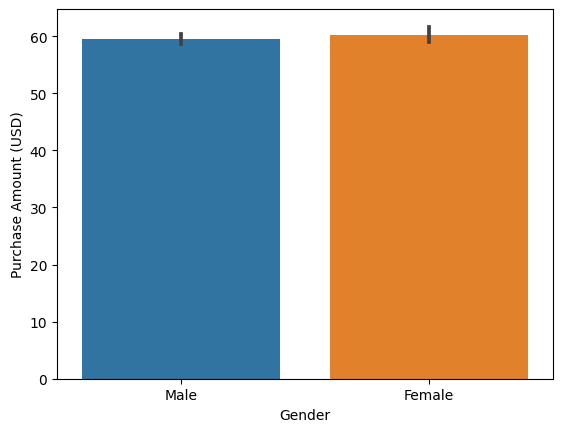

In [10]:
# Convert 'Purchase Amount (USD)' to numeric if it's not already
shop['Purchase Amount (USD)'] = pd.to_numeric(shop['Purchase Amount (USD)'], errors='coerce')
# Plot using Seaborn
sns.barplot(data=shop, x='Gender', y='Purchase Amount (USD)')

In [11]:
# we are seeking Item purchased based on Category
shop.groupby('Category')['Item Purchased'].value_counts()


Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: Item Purchased, dtype: int64

In [12]:
shop['Purchase Amount (USD)'].sum()

233081

In [13]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()


Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

In [14]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False)


Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

In [15]:
shop_groupby = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()
fig = px.sunburst(shop , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()


In [16]:
fig = px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()


In [17]:
# we are cutting the age into some category and storing in the different column
shop['Age_category'] = pd.cut(shop['Age'],
                                bins= [0,15, 18 , 30 , 50 , 70] ,
                                    labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults','old'] )
shop[['Age' , 'Age_category']]


,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [19]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()
print(shop_group)
fig = px.bar(shop_group, x = 'Size' , y = 'Purchase Amount (USD)')
fig.show()


  Size  Purchase Amount (USD)
0    L                  61667
1    M                 105167
2    S                  40468
3   XL                  25779


In [20]:
shop.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [21]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending=False)


Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: Shipping Type, dtype: int64

In [22]:
shop['Shipping_Category'] =shop['Shipping Type'].map({'Express': 0, 'Free Shipping': 1, 'Next Day Air': 2,
'Standard': 3, '2-Day Shipping': 4, 'Store Pickup': 5})
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [23]:
shop['Category_num'] =shop['Category'].map({'Clothing':1, 'Footwear':2, 'Outerwear':3, 'Accessories':4})
shop.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category',
       'Shipping_Category', 'Category_num'],
      dtype='object')

In [24]:
shop['Color'].value_counts().nlargest(5)


Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: Color, dtype: int64

In [25]:
shop['Previous Purchases'].mean()

25.35153846153846

In [26]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)


Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

In [27]:
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()
